# Capstone Project - The Battle of the Neighborhoods

## Importing the libaries

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries imported.')

Libraries imported.


## Web Scraping and geting the Infomation

In [4]:
List_url='https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi'
source = requests.get(List_url).text

In [5]:
soup = BeautifulSoup(source, 'xml')
l=[]
for match in soup.find_all('span',class_='mw-headline'):
    a=match.text
    if(a=='See also' or a=='References' or a=='External links'):
        continue
    else:
        l+=[a]
c=(['Area'],['Suroundings'])
#df=pd.DataFrame(l,columns=c)

#print(df)

In [6]:
soup = BeautifulSoup(source, 'xml')
b=[]

#m=c.ul.li

for match in soup.find_all('ul'):
    a=match.text
    if(a=='\n1 North West Delhi\n2 North Delhi\n3 North East Delhi\n4 Central Delhi\n5 New Delhi\n6 East Delhi\n7 South Delhi\n8 South West Delhi\n9 West Delhi\n10 See also\n11 References\n12 External links\n'):
        continue
    else:
    
       #print(a)
    #print()
        b+=[a]
q=[]
import string
for i in range(0,9):
    z=b[i].replace('\n',',')
    q+=[z]
data={'Area':l,'Suroundings':q}
df=pd.DataFrame(data) 
print(df)
#print(q[-1])

               Area                                        Suroundings
0  North West Delhi  Adarsh Nagar,Ashok Vihar,Azadpur,Bawana,Begum ...
1       North Delhi  Shakti Nagar,Bara Hindu Rao,Chandni Chowk,Chaw...
2  North East Delhi  Babarpur,Dilshad Garden,Kabir Nagar,Mandoli,Ma...
3     Central Delhi  Chandni Chowk,Daryaganj,Jhandewalan,Karol Bagh...
4         New Delhi  Barakhamba Road,Chanakyapuri,Connaught Place,G...
5        East Delhi  Brij Puri,East Vinod Nagar,Gandhi Nagar,Geeta ...
6       South Delhi  Alaknanda,Chhattarpur,Chittaranjan Park,Dayana...
7  South West Delhi  Dabri, New Delhi,Dwarka Sub City,Delhi Cantonm...
8        West Delhi  Ashok Nagar,Bali Nagar,Dhaula Kuan,Fateh Nagar...


In [7]:
List_url='https://www.mapsofindia.com/pincode/india/delhi/central-delhi/'
source = requests.get(List_url).text

In [8]:
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')
column_names=['Location ','Pincode','States','District']
df = pd.DataFrame(columns=column_names)


In [9]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        df.loc[len(df)] = row_data
d1=df
d1=d1[1:]
df.shape

(59, 4)

In [10]:
List_url='https://www.mapsofindia.com/pincode/india/delhi/east-delhi/'
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')
column_names=['Location ','Pincode','States','District']
d = pd.DataFrame(columns=column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        d.loc[len(d)] = row_data
d2=d
d2=d2[1:]
d2.shape

(69, 4)

In [11]:
data=pd.concat([d1, d2]) 

In [12]:
print(data)

                  Location  Pincode States       District
1                  A.G.c.r.  110002  Delhi  Central Delhi
2                A.K.market  110055  Delhi  Central Delhi
3         Ajmeri Gate extn.  110002  Delhi  Central Delhi
4              Anand Parbat  110005  Delhi  Central Delhi
5   Anand Parbat indl. area  110005  Delhi  Central Delhi
..                      ...     ...    ...            ...
65        Vasundhra Enclave  110096  Delhi     East Delhi
66            Vishwas Nagar  110032  Delhi     East Delhi
67              Vivek Vihar  110095  Delhi     East Delhi
68             Yamuna Vihar  110053  Delhi     East Delhi
69              Yozna Vihar  110092  Delhi     East Delhi

[127 rows x 4 columns]


In [13]:
print(data.to_string())


                         Location  Pincode States       District
1                         A.G.c.r.  110002  Delhi  Central Delhi
2                       A.K.market  110055  Delhi  Central Delhi
3                Ajmeri Gate extn.  110002  Delhi  Central Delhi
4                     Anand Parbat  110005  Delhi  Central Delhi
5          Anand Parbat indl. area  110005  Delhi  Central Delhi
6                      Bank Street  110005  Delhi  Central Delhi
7                     Baroda House  110001  Delhi  Central Delhi
8                   Bengali Market  110001  Delhi  Central Delhi
9              Bhagat Singh market  110001  Delhi  Central Delhi
10                 Connaught Place  110001  Delhi  Central Delhi
11              Constitution House  110001  Delhi  Central Delhi
12               Dada Ghosh bhawan  110008  Delhi  Central Delhi
13                      Darya Ganj  110002  Delhi  Central Delhi
14                Delhi High court  110003  Delhi  Central Delhi
15          Desh Bandhu g

In [14]:
List_url='https://www.mapsofindia.com/pincode/india/delhi/north-delhi/'
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')
column_names=['Location ','Pincode','States','District']
d = pd.DataFrame(columns=column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        d.loc[len(d)] = row_data
d3=d
d3=d3[1:]
d3.shape

(26, 4)

In [15]:
data=pd.concat([d1, d2, d3]) 
print(data)

                  Location  Pincode States       District
1                  A.G.c.r.  110002  Delhi  Central Delhi
2                A.K.market  110055  Delhi  Central Delhi
3         Ajmeri Gate extn.  110002  Delhi  Central Delhi
4              Anand Parbat  110005  Delhi  Central Delhi
5   Anand Parbat indl. area  110005  Delhi  Central Delhi
..                      ...     ...    ...            ...
22               Roop Nagar  110007  Delhi    North Delhi
23          Roshan Ara road  110007  Delhi    North Delhi
24                S.T. road  110006  Delhi    North Delhi
25             Shakti Nagar  110007  Delhi    North Delhi
26                 Timarpur  110054  Delhi    North Delhi

[153 rows x 4 columns]


In [16]:
List_url='https://www.mapsofindia.com/pincode/india/delhi/north-west-delhi/'
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')
column_names=['Location ','Pincode','States','District']
d = pd.DataFrame(columns=column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        d.loc[len(d)] = row_data
d4=d
d4=d4[1:]
d4.shape

(100, 4)

In [17]:
data=pd.concat([d1, d2, d3 , d4]) 
print(data)

                   Location  Pincode States          District
1                   A.G.c.r.  110002  Delhi     Central Delhi
2                 A.K.market  110055  Delhi     Central Delhi
3          Ajmeri Gate extn.  110002  Delhi     Central Delhi
4               Anand Parbat  110005  Delhi     Central Delhi
5    Anand Parbat indl. area  110005  Delhi     Central Delhi
..                       ...     ...    ...               ...
96        Sultanpuri B block  110086  Delhi  North West delhi
97        Sultanpuri C block  110086  Delhi  North West delhi
98        Sultanpuri F block  110086  Delhi  North West delhi
99              Tajpur Kalan  110036  Delhi  North West delhi
100            Wazir Pur iii  110052  Delhi  North West delhi

[253 rows x 4 columns]


In [18]:
List_url='https://www.mapsofindia.com/pincode/india/delhi/south-delhi/'
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')
column_names=['Location ','Pincode','States','District']
d = pd.DataFrame(columns=column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        d.loc[len(d)] = row_data
d5=d
d5=d5[1:]
d5.shape

(77, 4)

In [19]:
data=pd.concat([d1, d2, d3 , d4,d5]) 
print(data)

                    Location  Pincode States       District
1                    A.G.c.r.  110002  Delhi  Central Delhi
2                  A.K.market  110055  Delhi  Central Delhi
3           Ajmeri Gate extn.  110002  Delhi  Central Delhi
4                Anand Parbat  110005  Delhi  Central Delhi
5     Anand Parbat indl. area  110005  Delhi  Central Delhi
..                        ...     ...    ...            ...
73                  Talimabad  110062  Delhi    South Delhi
74                   Tehkhand  110019  Delhi    South Delhi
75                 Tugalkabad  110019  Delhi    South Delhi
76  Tugalkabad Railway colony  110044  Delhi    South Delhi
77                Zakir Nagar  110025  Delhi    South Delhi

[330 rows x 4 columns]


In [20]:
List_url='https://www.mapsofindia.com/pincode/india/delhi/south-west-delhi/'
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')
column_names=['Location ','Pincode','States','District']
d = pd.DataFrame(columns=column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        d.loc[len(d)] = row_data
d6=d
d6=d6[1:]
d6.shape

(136, 4)

In [21]:
data=pd.concat([d1, d2, d3 , d4,d5,d6]) 
print(data)

                   Location  Pincode States          District
1                   A.G.c.r.  110002  Delhi     Central Delhi
2                 A.K.market  110055  Delhi     Central Delhi
3          Ajmeri Gate extn.  110002  Delhi     Central Delhi
4               Anand Parbat  110005  Delhi     Central Delhi
5    Anand Parbat indl. area  110005  Delhi     Central Delhi
..                       ...     ...    ...               ...
132                     Ujwa  110073  Delhi  South West delhi
133              Vasant Kunj  110070  Delhi  South West delhi
134        Vasant Kunj pkt-a  110070  Delhi  South West delhi
135           Vasant Vihar-1  110057  Delhi  South West delhi
136           Vasant Vihar-2  110057  Delhi  South West delhi

[466 rows x 4 columns]


In [22]:
List_url='https://www.mapsofindia.com/pincode/india/delhi/west-delhi/'
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')
column_names=['Location ','Pincode','States','District']
d = pd.DataFrame(columns=column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        d.loc[len(d)] = row_data
d7=d
d7=d7[1:]
d7.shape

(61, 4)

In [23]:
data=pd.concat([d1, d2, d3 , d4,d5,d6,d7]) 
data.shape

(527, 4)

In [24]:
#.drop(['States'],axis=1,inplace=True)
print(data)
#d=data[['Pincode'],['District'],['Location']]

                  Location  Pincode States       District
1                  A.G.c.r.  110002  Delhi  Central Delhi
2                A.K.market  110055  Delhi  Central Delhi
3         Ajmeri Gate extn.  110002  Delhi  Central Delhi
4              Anand Parbat  110005  Delhi  Central Delhi
5   Anand Parbat indl. area  110005  Delhi  Central Delhi
..                      ...     ...    ...            ...
57         Tilak Nagar east  110018  Delhi     West Delhi
58              Uttam Nagar  110059  Delhi     West Delhi
59               Vikas Puri  110018  Delhi     West Delhi
60            Vishnu Garden  110018  Delhi     West Delhi
61                  Zakhira  110015  Delhi     West Delhi

[527 rows x 4 columns]


In [25]:
data=data.drop(['States'], axis = 1)

In [26]:
data. reset_index()
data

,Location,Pincode,District
1,A.G.c.r.,110002,Central Delhi
2,A.K.market,110055,Central Delhi
3,Ajmeri Gate extn.,110002,Central Delhi
4,Anand Parbat,110005,Central Delhi
5,Anand Parbat indl. area,110005,Central Delhi
...,...,...,...
57,Tilak Nagar east,110018,West Delhi
58,Uttam Nagar,110059,West Delhi
59,Vikas Puri,110018,West Delhi
60,Vishnu Garden,110018,West Delhi


In [27]:
#data=data[['Pincode','District','Location']]
data

,Location,Pincode,District
1,A.G.c.r.,110002,Central Delhi
2,A.K.market,110055,Central Delhi
3,Ajmeri Gate extn.,110002,Central Delhi
4,Anand Parbat,110005,Central Delhi
5,Anand Parbat indl. area,110005,Central Delhi
...,...,...,...
57,Tilak Nagar east,110018,West Delhi
58,Uttam Nagar,110059,West Delhi
59,Vikas Puri,110018,West Delhi
60,Vishnu Garden,110018,West Delhi


In [28]:
data = data.reset_index(drop=True)

In [29]:
data

,Location,Pincode,District
0,A.G.c.r.,110002,Central Delhi
1,A.K.market,110055,Central Delhi
2,Ajmeri Gate extn.,110002,Central Delhi
3,Anand Parbat,110005,Central Delhi
4,Anand Parbat indl. area,110005,Central Delhi
...,...,...,...
522,Tilak Nagar east,110018,West Delhi
523,Uttam Nagar,110059,West Delhi
524,Vikas Puri,110018,West Delhi
525,Vishnu Garden,110018,West Delhi


## Geting the Latitudes and Longitudes

In [30]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [31]:
df_coords=pd.read_csv("Pincode.csv")
#df_coords=pd.DataFrame(coords,columns=['Latitude','Longitude'])
df_coords.head()

,Latitude,Longitude
0,28.637360,77.244038
1,28.644935,77.210786
2,28.637360,77.244038
3,28.652560,77.191682
4,28.652560,77.191682


In [32]:
df_coords.insert(0, "Location", data['Location '], True) 
df_coords

,Location,Latitude,Longitude
0,A.G.c.r.,28.637360,77.244038
1,A.K.market,28.644935,77.210786
2,Ajmeri Gate extn.,28.637360,77.244038
3,Anand Parbat,28.652560,77.191682
4,Anand Parbat indl. area,28.652560,77.191682
...,...,...,...
522,Tilak Nagar east,28.643545,77.085717
523,Uttam Nagar,28.629369,77.049760
524,Vikas Puri,28.643545,77.085717
525,Vishnu Garden,28.643545,77.085717


## Creating Map of Delhi with its neighbourhoods superimposed on it¶


In [33]:
address = 'Delhi,India'

geolocator = Nominatim(user_agent="test")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Delhi,India {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Delhi,India 28.6273928, 77.1716954.


In [34]:
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_coords['Latitude'], df_coords['Longitude'],df_coords['Location']):
    label = '{}, Hyderabad'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

## Geting the Information about the Neighbourhood Using Foursquare

In [38]:
CLIENT_ID = '2V2Q1XLNC31ZCQLSDRXGW1XUQEMFH0WT3YKO1LPFG5SE0QUU' # your Foursquare ID
CLIENT_SECRET = 'D3G14VT3GXMZ0Z31STXMC5W4JFZ0TGTP2J1S4MZJCELPCAXB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT=100

Your credentails:
CLIENT_ID: 2V2Q1XLNC31ZCQLSDRXGW1XUQEMFH0WT3YKO1LPFG5SE0QUU
CLIENT_SECRET:D3G14VT3GXMZ0Z31STXMC5W4JFZ0TGTP2J1S4MZJCELPCAXB


In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:

Delhi_venues = getNearbyVenues(names=df_coords['Location'],
                                   latitudes=df_coords['Latitude'],
                                   longitudes=df_coords['Longitude']
                                  )
Delhi_venues.shape

A.G.c.r.
A.K.market
Ajmeri Gate extn.
Anand Parbat
Anand Parbat indl. area
Bank Street
Baroda House
Bengali Market
Bhagat Singh market
Connaught Place
Constitution House
Dada Ghosh bhawan
Darya Ganj
Delhi High court
Desh Bandhu gupta road
Election Commission
Gandhi Smarak nidhi
Guru Gobind singh marg
Gym Khana club
Hauz Qazi
I.A.r.i.
I.P.estate
Inderpuri
Indraprastha
Jama Masjid
Janpath
Karol Bagh
Krishi Bhawan
Lady Harding medical college
Master Prithvi nath marg
Minto Road
Multani Dhanda
National Physical laboratory
Nirman Bhawan
North Avenue
Pahar Ganj
Pandara Road
Parliament House
Patel Nagar
Patel Nagar east
Patel Nagar south
Patel Nagar west
Patiala House
Pragati Maidan
Rail Bhawan
Rajender Nagar
Rajghat Power house
Rashtrapati Bhawan
Sansad Marg
Sansadiya Soudh
Sat Nagar
Secretariat North
Shastri Bhawan
South Avenue
Supreme Court
Swami Ram tirth nagar
Udyog Bhawan
Union Public service commissio
Anand Vihar
Azad Nagar
Babarpur
Balbir Nagar
Bhajan Pura
Bhola Nath nagar
Brahampuri


(2476, 7)

In [41]:
Delhi_venues.head()


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A.G.c.r.,28.637360,77.244038,Feroz Shah Kotla Stadium | फिरोज शाह कोटला स्ट...,28.637907,77.241869,Cricket Ground
1,A.G.c.r.,28.637360,77.244038,National Gandhi Museum,28.638919,77.245926,History Museum
2,A.G.c.r.,28.637360,77.244038,Ambedkar Stadium,28.638985,77.242349,Soccer Stadium
3,A.G.c.r.,28.637360,77.244038,Kotla Firoz Shah,28.635117,77.242853,Historic Site
4,A.K.market,28.644935,77.210786,Sita Ram Diwan Chand Chole Bhature,28.642324,77.210417,Food


In [42]:
Delhi_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
505 A b workshop,4,4,4,4,4,4
A F palam,4,4,4,4,4,4
A F rajokari,1,1,1,1,1,1
A-3 Janak puri,4,4,4,4,4,4
A.G.c.r.,4,4,4,4,4,4
...,...,...,...,...,...,...
Vivek Vihar,2,2,2,2,2,2
Wazir Pur iii,4,4,4,4,4,4
Yozna Vihar,17,17,17,17,17,17


In [43]:
print('There are {} uniques categories of Venues.'.format(len(Delhi_venues['Venue Category'].unique())))

There are 116 uniques categories of Venues.


In [44]:
# one hot encoding
Delhi_onehot = pd.get_dummies(Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Delhi_onehot['Neighbourhood'] = Delhi_venues['Neighbourhood']

# move neighborhood column to the first column
#fixed_columns = [hyderabad_onehot.columns[-1]] + list(hyderabad_onehot.columns[-1:])
#hyderabad_onehot = hyderabad_onehot[fixed_columns]

Delhi_onehot =Delhi_onehot.set_index('Neighbourhood')
Delhi_onehot.head(10)

,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,...,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Tea Room,Tex-Mex Restaurant,Toy / Game Store,Train Station
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
A.G.c.r.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.G.c.r.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.G.c.r.,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
A.G.c.r.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.K.market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.K.market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.K.market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.K.market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.K.market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Delhi_onehot.shape

(2476, 116)

In [46]:
Delhi_grouped = Delhi_onehot.groupby('Neighbourhood').mean().reset_index()
Delhi_grouped

,Neighbourhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Tea Room,Tex-Mex Restaurant,Toy / Game Store,Train Station
0,505 A b workshop,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,A F palam,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,A F rajokari,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,A-3 Janak puri,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,A.G.c.r.,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.25,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,Vivek Vihar,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,...,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
427,Wazir Pur iii,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
428,Yozna Vihar,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
429,Zakhira,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


In [47]:
num_top_venues = 5
i=0
while i < 6 :
    for hood in Delhi_grouped['Neighbourhood']:
        print("----"+hood+"----")
        temp = Delhi_grouped[Delhi_grouped['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')
        i=i+1
        if i>=6 :
            break

----505 A b workshop----
           venue  freq
0    Coffee Shop  0.25
1           Café  0.25
2      Cafeteria  0.25
3  Shopping Mall  0.25
4            ATM  0.00


----A F palam----
           venue  freq
0    Coffee Shop  0.25
1           Café  0.25
2      Cafeteria  0.25
3  Shopping Mall  0.25
4            ATM  0.00


----A F rajokari----
                            venue  freq
0                             ATM   1.0
1                    Liquor Store   0.0
2                       Multiplex   0.0
3  Multicuisine Indian Restaurant   0.0
4                   Moving Target   0.0


----A-3 Janak puri----
            venue  freq
0  Nightlife Spot  0.25
1            Park  0.25
2          Bakery  0.25
3            Café  0.25
4          Lounge  0.00


----A.G.c.r.----
            venue  freq
0  Cricket Ground  0.25
1  History Museum  0.25
2   Historic Site  0.25
3  Soccer Stadium  0.25
4             ATM  0.00


----A.K.market----
               venue  freq
0              Hotel  0.44
1  Indian

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Delhi_grouped['Neighbourhood']

for ind in np.arange(Delhi_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Delhi_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,505 A b workshop,Coffee Shop,Café,Cafeteria,Shopping Mall,Train Station,Food & Drink Shop,Dessert Shop,Diner,Discount Store,Donut Shop
1,A F palam,Coffee Shop,Café,Cafeteria,Shopping Mall,Train Station,Food & Drink Shop,Dessert Shop,Diner,Discount Store,Donut Shop
2,A F rajokari,ATM,Food Court,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
3,A-3 Janak puri,Nightlife Spot,Park,Café,Bakery,Train Station,Food & Drink Shop,Dessert Shop,Diner,Discount Store,Donut Shop
4,A.G.c.r.,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner


In [50]:
len(Delhi_grouped['Restaurant']>0)


431

In [51]:
Delhi_grouped_clustering = Delhi_grouped.drop('Neighbourhood', 1)


In [52]:
distortions=[]
K = range(1,15)


for k in K :
# run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Delhi_grouped_clustering)
    distortions.append(kmeans.inertia_)

distortions

[153.2409838053315,
 125.40993781286733,
 111.08890769060325,
 102.73386116860216,
 95.51351805542578,
 88.11334489421317,
 80.69682793114426,
 75.49909375208279,
 70.18488918553386,
 67.74876785626564,
 61.43073964440799,
 57.70558134160386,
 54.508870214765665,
 51.482952137397774]

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

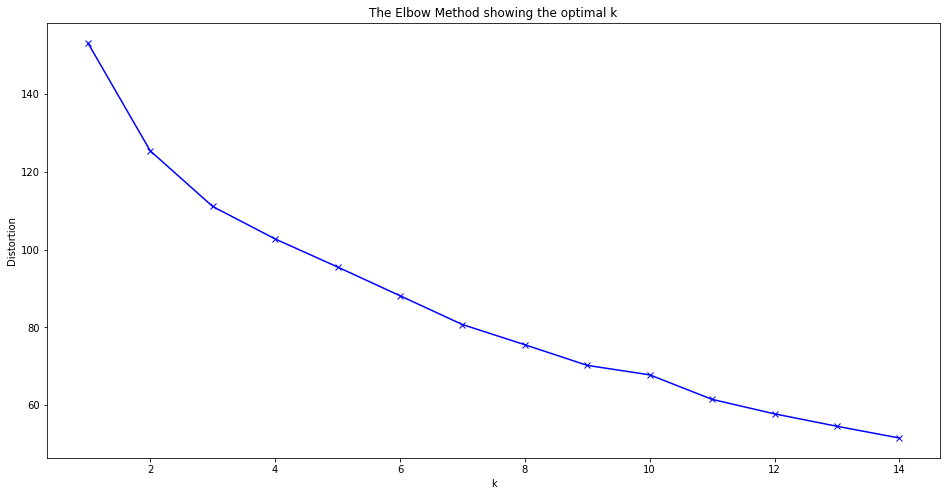

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [54]:
# set number of clusters
k = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(Delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 2, 2, 3, 2, 0, 0, 2])

In [55]:
neighbourhoods_venues_sorted.insert(1, 'Labels', kmeans.labels_)
#neighbourhoods_venues_sorted.drop(['Labels'],axis=1, inplace=True)
neighbourhoods_venues_sorted.head()

,Neighbourhood,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,505 A b workshop,2,Coffee Shop,Café,Cafeteria,Shopping Mall,Train Station,Food & Drink Shop,Dessert Shop,Diner,Discount Store,Donut Shop
1,A F palam,2,Coffee Shop,Café,Cafeteria,Shopping Mall,Train Station,Food & Drink Shop,Dessert Shop,Diner,Discount Store,Donut Shop
2,A F rajokari,0,ATM,Food Court,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
3,A-3 Janak puri,2,Nightlife Spot,Park,Café,Bakery,Train Station,Food & Drink Shop,Dessert Shop,Diner,Discount Store,Donut Shop
4,A.G.c.r.,2,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner


In [75]:
#Delhi_data =data.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
#Delhi_

Delhi_data =df_coords.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Location')
Delhi_data.head()

#data.tail()

,Location,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.G.c.r.,28.637360,77.244038,2.0,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner
1,A.K.market,28.644935,77.210786,3.0,Hotel,Indian Restaurant,Restaurant,Motel,Sandwich Place,Pizza Place,Breakfast Spot,Korean Restaurant,Fast Food Restaurant,Café
2,Ajmeri Gate extn.,28.637360,77.244038,2.0,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner
3,Anand Parbat,28.652560,77.191682,2.0,Snack Place,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,BBQ Joint,Train Station,Falafel Restaurant,Food,Flea Market
4,Anand Parbat indl. area,28.652560,77.191682,2.0,Snack Place,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,BBQ Joint,Train Station,Falafel Restaurant,Food,Flea Market


In [76]:
print(Delhi_data[Delhi_data['Labels'].isnull()])
Delhi_data = Delhi_data.dropna(subset=['Labels'])
Delhi_data.head()

                         Location   Latitude  Longitude  Labels  \
20                       I.A.r.i.  28.636420  77.160637     NaN   
22                      Inderpuri  28.636420  77.160637     NaN   
32   National Physical laboratory  28.636420  77.160637     NaN   
62                    Bhajan Pura  28.687045  77.253071     NaN   
64                     Brahampuri  28.687045  77.253071     NaN   
..                            ...        ...        ...     ...   
442                         Raota  28.566466  76.892945     NaN   
445                    S P school  28.457945  77.205717     NaN   
446                      Sagarpur  28.604185  77.100883     NaN   
449                       Satbari  28.457945  77.205717     NaN   
461                          Ujwa  28.566466  76.892945     NaN   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
20                    NaN                   NaN                   NaN   
22                    NaN                   NaN  

,Location,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.G.c.r.,28.637360,77.244038,2.0,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner
1,A.K.market,28.644935,77.210786,3.0,Hotel,Indian Restaurant,Restaurant,Motel,Sandwich Place,Pizza Place,Breakfast Spot,Korean Restaurant,Fast Food Restaurant,Café
2,Ajmeri Gate extn.,28.637360,77.244038,2.0,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner
3,Anand Parbat,28.652560,77.191682,2.0,Snack Place,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,BBQ Joint,Train Station,Falafel Restaurant,Food,Flea Market
4,Anand Parbat indl. area,28.652560,77.191682,2.0,Snack Place,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,BBQ Joint,Train Station,Falafel Restaurant,Food,Flea Market


In [77]:
Delhi_data.shape

(433, 14)

## Marking the Clusters on the map 

In [109]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(Delhi_data['Latitude'], Delhi_data['Longitude'], Delhi_data['Location'], Delhi_data['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
    
print(c)
map_clusters

433


## Examine Clusters

### Cluster 0

In [80]:
Delhi_data.loc[Delhi_data['Labels'] == 0].head()


,Location,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
153,Adrash Nagar,28.723000,77.171315,0.0,ATM,Food Court,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
165,Bhalaswa,28.723000,77.171315,0.0,ATM,Food Court,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
180,Holambi Kalan,28.782385,77.103480,0.0,ATM,Food Court,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
182,Jahangir Puri a block,28.723000,77.171315,0.0,ATM,Food Court,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
183,Jahangir Puri d block,28.723000,77.171315,0.0,ATM,Food Court,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market


In [81]:
Delhi_data.loc[Delhi_data['Labels'] == 0].shape


(35, 14)

### Cluster 1

In [82]:
Delhi_data.loc[Delhi_data['Labels'] == 1].head()


,Location,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
67,Dilshad Garden,28.685065,77.323613,1.0,Electronics Store,BBQ Joint,Train Station,Food Truck,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Farmers Market
69,G.T.b. hospital,28.685065,77.323613,1.0,Electronics Store,BBQ Joint,Train Station,Food Truck,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Farmers Market
81,Jhilmil,28.685065,77.323613,1.0,Electronics Store,BBQ Joint,Train Station,Food Truck,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Farmers Market
82,Jhilmil Tahirpur,28.685065,77.323613,1.0,Electronics Store,BBQ Joint,Train Station,Food Truck,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Farmers Market
101,New Seemapuri,28.685065,77.323613,1.0,Electronics Store,BBQ Joint,Train Station,Food Truck,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Farmers Market


In [91]:
Delhi_data.loc[Delhi_data['Labels'] == 1].shape

(21, 14)

### Cluster 2

In [92]:
Delhi_data.loc[Delhi_data['Labels'] == 2].head()


,Location,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.G.c.r.,28.63736,77.244038,2.0,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner
2,Ajmeri Gate extn.,28.63736,77.244038,2.0,Historic Site,Soccer Stadium,Cricket Ground,History Museum,Gym,Grocery Store,Deli / Bodega,Department Store,Dessert Shop,Diner
3,Anand Parbat,28.65256,77.191682,2.0,Snack Place,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,BBQ Joint,Train Station,Falafel Restaurant,Food,Flea Market
4,Anand Parbat indl. area,28.65256,77.191682,2.0,Snack Place,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,BBQ Joint,Train Station,Falafel Restaurant,Food,Flea Market
5,Bank Street,28.65256,77.191682,2.0,Snack Place,Dessert Shop,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,BBQ Joint,Train Station,Falafel Restaurant,Food,Flea Market


In [94]:
Delhi_data.loc[Delhi_data['Labels'] == 2].shape

(305, 14)

### Cluster 3

In [96]:
Delhi_data.loc[Delhi_data['Labels'] == 3].head()


,Location,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A.K.market,28.644935,77.210786,3.0,Hotel,Indian Restaurant,Restaurant,Motel,Sandwich Place,Pizza Place,Breakfast Spot,Korean Restaurant,Fast Food Restaurant,Café
13,Delhi High court,28.592126,77.234090,3.0,Indian Restaurant,Hotel,Hotel Bar,Convenience Store,Restaurant,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
31,Multani Dhanda,28.644935,77.210786,3.0,Hotel,Indian Restaurant,Restaurant,Motel,Sandwich Place,Pizza Place,Breakfast Spot,Korean Restaurant,Fast Food Restaurant,Café
35,Pahar Ganj,28.644935,77.210786,3.0,Hotel,Indian Restaurant,Restaurant,Motel,Sandwich Place,Pizza Place,Breakfast Spot,Korean Restaurant,Fast Food Restaurant,Café
36,Pandara Road,28.592126,77.234090,3.0,Indian Restaurant,Hotel,Hotel Bar,Convenience Store,Restaurant,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [97]:
Delhi_data.loc[Delhi_data['Labels'] == 3].shape


(72, 14)

## Conclusion

Based on these Clusters , it is very clear that there are less restaurant in Cluster 0 ,Cluster 1 and Cluster3 respectively. So there is a scope to establish a restaurant which does not need to complete with already existing and well established restaurant. Also, if we observe Cluster 0 is completely outskirts (refer map ) and situation may arise that there will not be enough customers available in those areas. At the same time , Cluster 3 has less restaurant but is in the heart of the city.  Also the cluster 1 has less number of restaurant and has various dicounted stores and shops and Scenic Lookout stores, which means this is the right cluster to invest in restaurant as there are customers who can be attracted towards our restaurant due to the lack of proper restaurant in this cluster.